In [46]:
#importing liabraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans,AgglomerativeClustering 
from sklearn.metrics import silhouette_score

In [7]:
#loading the dataset 
df=pd.read_csv("Mall_Customers.csv")
print(df)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [10]:
#extracting the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
x=df.iloc[:,3:]

In [13]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


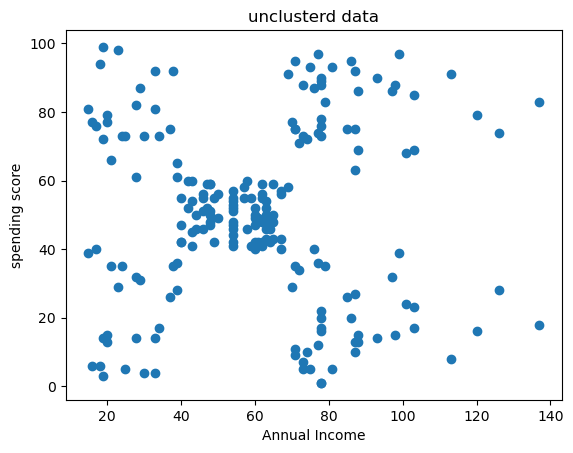

In [20]:
plt.title('unclusterd data')
plt.xlabel("Annual Income")
plt.ylabel("spending score")
plt.scatter(x['Annual Income (k$)'],x["Spending Score (1-100)"])

In [33]:
km=KMeans(n_clusters=3)

In [27]:
x.shape

(200, 2)

In [ ]:
km.fit_predict(x)

In [37]:
#inertia give Sum sq error 
km.inertia_

106348.37306211122

In [ ]:
sse=[]
for k in  range(1,16):
    km=KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [42]:
sse

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30241.34361793658,
 25022.48500453035,
 22143.222100767445,
 19657.78360870395,
 17508.97057740007,
 16248.777149585127,
 14264.768695356928,
 13332.30837789661,
 11945.670590683825]

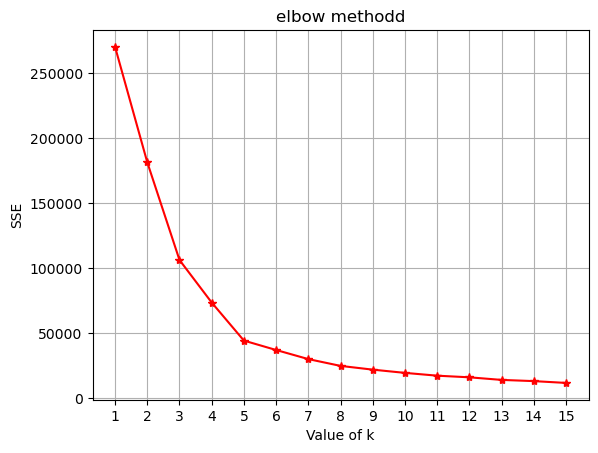

In [47]:
plt.title("elbow methodd")
plt.xlabel("Value of k")
plt.ylabel("SSE")
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='*',color="red")

In [ ]:
sih=[]
for k in  range(2,16):
    km=KMeans(n_clusters=k)
    labels= km.fit_predict(x)
    score=silhouette_score(x,labels)
    sih.append(score)

In [63]:
sih

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5379675585622219,
 0.5288104473798049,
 0.45673055353191067,
 0.4565077334305076,
 0.45925273534781125,
 0.44581460933978173,
 0.423628333260055,
 0.4136740581726647,
 0.4123413015856755,
 0.4145332846235816]

<BarContainer object of 14 artists>

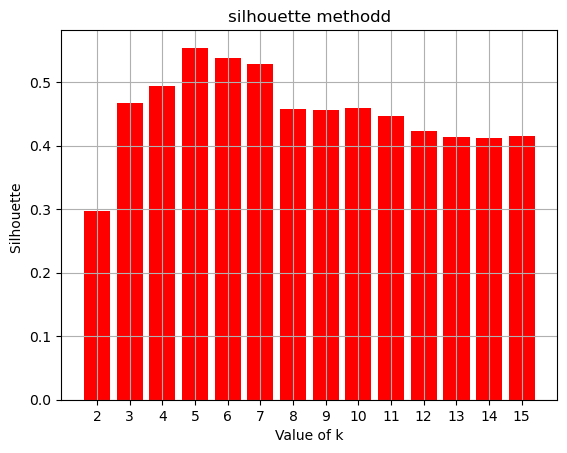

In [67]:
plt.title("silhouette methodd")
plt.xlabel("Value of k")
plt.ylabel("Silhouette ")
plt.grid()
plt.xticks(range(2,16))
plt.bar(range(2,16),sih,color="red")

In [69]:
km=KMeans(n_clusters=5)

In [72]:
labels=km.fit_predict(x)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [80]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [82]:
cent=km.cluster_centers_

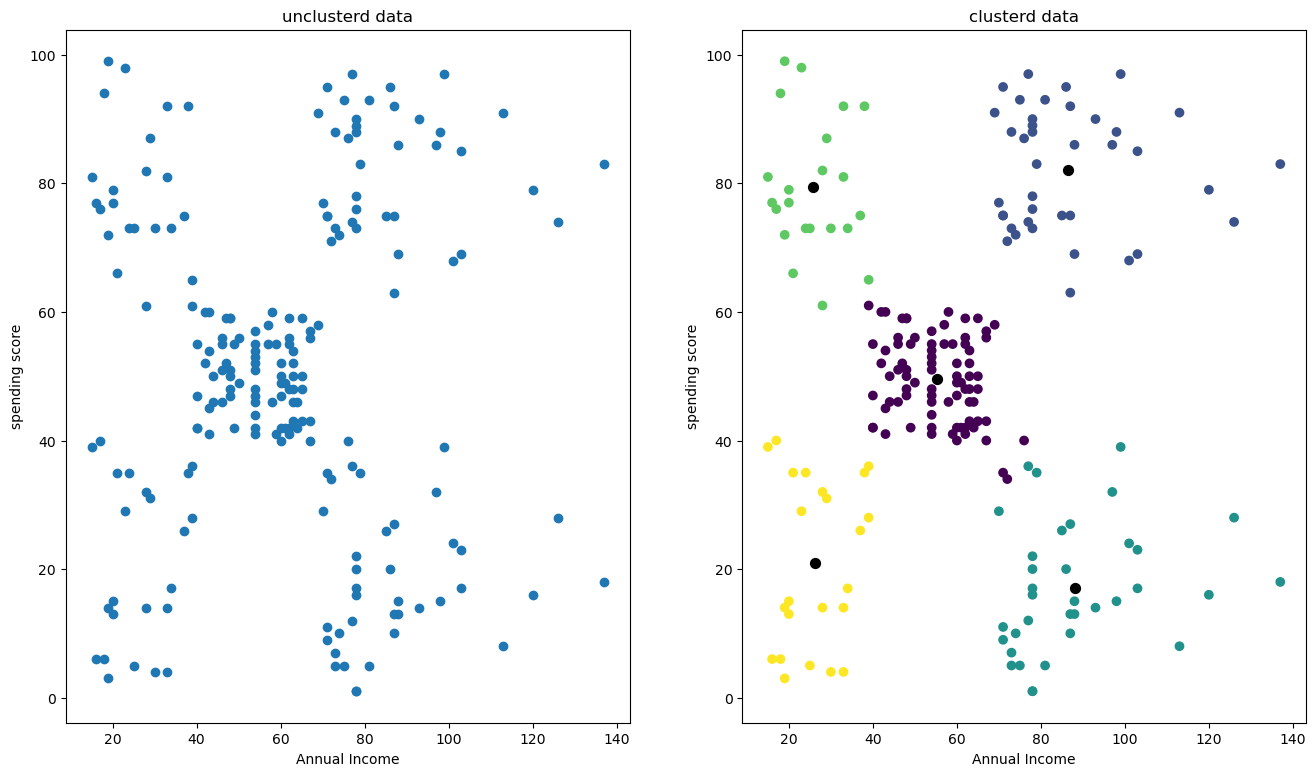

In [84]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('unclusterd data')
plt.xlabel("Annual Income")
plt.ylabel("spending score")
plt.scatter(x['Annual Income (k$)'],x["Spending Score (1-100)"])


plt.subplot(1,2,2)
plt.title('clusterd data')
plt.xlabel("Annual Income")
plt.ylabel("spending score")
plt.scatter(x['Annual Income (k$)'],x["Spending Score (1-100)"],
           c=labels)

plt.scatter(cent[:,0],cent[:,1],s=50,color="k")